# Logistic Regression

In this notebook, I will be deploying a logistic regression model to classify loan applicants as a "good" credit risk vs a "bad" credit risk and will be using the GermanCredit data set http://archive.ics.uci.edu/ml/machinelearning-databases/statlog/german data dictionary at
http://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29



### Load data and check head



In [22]:
credit <- read.table("germancredit.txt")
head(credit)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1




### Convert response to 1's and 0's

Since binomial family of `glm` function recognizes 0 and 1 as the classfication values, so our first step is to convert 1s and 2s to 0s and 1s as a factor for the response variable.



In [23]:
credit$V21[credit$V21==1]<-0
credit$V21[credit$V21==2]<-1
credit$V21 <- factor(credit$V21,levels=c(0,1),labels=c("Good", "Bad"))
head(credit)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,Good
A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,Bad
A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,Good
A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,Good
A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,Bad
A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,Good


In [24]:
table(credit$V21)


Good  Bad 
 700  300 



The dataset is biased towards "good" credit risk. This is not neccesarily a bad thing because we can really dive into the features that lead to an applicant being a "bad" credit risk.





### Check summary of data



In [25]:
summary(credit)

   V1            V2         V3            V4            V5          V6     
 A11:274   Min.   : 4.0   A30: 40   A43    :280   Min.   :  250   A61:603  
 A12:269   1st Qu.:12.0   A31: 49   A40    :234   1st Qu.: 1366   A62:103  
 A13: 63   Median :18.0   A32:530   A42    :181   Median : 2320   A63: 63  
 A14:394   Mean   :20.9   A33: 88   A41    :103   Mean   : 3271   A64: 48  
           3rd Qu.:24.0   A34:293   A49    : 97   3rd Qu.: 3972   A65:183  
           Max.   :72.0             A46    : 50   Max.   :18424            
                                    (Other): 55                            
   V7            V8          V9        V10           V11          V12     
 A71: 62   Min.   :1.000   A91: 50   A101:907   Min.   :1.000   A121:282  
 A72:172   1st Qu.:2.000   A92:310   A102: 41   1st Qu.:2.000   A122:232  
 A73:339   Median :3.000   A93:548   A103: 52   Median :3.000   A123:332  
 A74:174   Mean   :2.973   A94: 92              Mean   :2.845   A124:154  
 A75:253   3rd Qu



### Check str of data



In [26]:
str(credit)

'data.frame':	1000 obs. of  21 variables:
 $ V1 : Factor w/ 4 levels "A11","A12","A13",..: 1 2 4 1 1 4 4 2 4 2 ...
 $ V2 : int  6 48 12 42 24 36 24 36 12 30 ...
 $ V3 : Factor w/ 5 levels "A30","A31","A32",..: 5 3 5 3 4 3 3 3 3 5 ...
 $ V4 : Factor w/ 10 levels "A40","A41","A410",..: 5 5 8 4 1 8 4 2 5 1 ...
 $ V5 : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ V6 : Factor w/ 5 levels "A61","A62","A63",..: 5 1 1 1 1 5 3 1 4 1 ...
 $ V7 : Factor w/ 5 levels "A71","A72","A73",..: 5 3 4 4 3 3 5 3 4 1 ...
 $ V8 : int  4 2 2 2 3 2 3 2 2 4 ...
 $ V9 : Factor w/ 4 levels "A91","A92","A93",..: 3 2 3 3 3 3 3 3 1 4 ...
 $ V10: Factor w/ 3 levels "A101","A102",..: 1 1 1 3 1 1 1 1 1 1 ...
 $ V11: int  4 2 3 4 4 4 4 2 4 2 ...
 $ V12: Factor w/ 4 levels "A121","A122",..: 1 1 1 2 4 4 2 3 1 3 ...
 $ V13: int  67 22 49 45 53 35 53 35 61 28 ...
 $ V14: Factor w/ 3 levels "A141","A142",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ V15: Factor w/ 3 levels "A151","A152",..: 2 2 2 3 3 3 2 1 2 2 ...
 $ V16: 



### Initial logistic regression model with all features present

To build a logistic regression model we must use the `glm` function. For our logistic regression `glm` model, I will use the `binomial` family with a `logit` link.



In [27]:
logistic_regression_model_all_features <- glm(V21 ~.,family=binomial(link = "logit"),data=credit)
summary(logistic_regression_model_all_features)


Call:
glm(formula = V21 ~ ., family = binomial(link = "logit"), data = credit)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3410  -0.6994  -0.3752   0.7095   2.6116  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  4.005e-01  1.084e+00   0.369 0.711869    
V1A12       -3.749e-01  2.179e-01  -1.720 0.085400 .  
V1A13       -9.657e-01  3.692e-01  -2.616 0.008905 ** 
V1A14       -1.712e+00  2.322e-01  -7.373 1.66e-13 ***
V2           2.786e-02  9.296e-03   2.997 0.002724 ** 
V3A31        1.434e-01  5.489e-01   0.261 0.793921    
V3A32       -5.861e-01  4.305e-01  -1.362 0.173348    
V3A33       -8.532e-01  4.717e-01  -1.809 0.070470 .  
V3A34       -1.436e+00  4.399e-01  -3.264 0.001099 ** 
V4A41       -1.666e+00  3.743e-01  -4.452 8.51e-06 ***
V4A410      -1.489e+00  7.764e-01  -1.918 0.055163 .  
V4A42       -7.916e-01  2.610e-01  -3.033 0.002421 ** 
V4A43       -8.916e-01  2.471e-01  -3.609 0.000308 ***
V4A44       -5.228e-0



### All features Logistic Regression model Commentary

From the p-values provided above, we can see that features V1A14, V4A41, V4A43, V6A65, and V8 are the most statistically significant features for predicting credit risk. The next group of significant features includes V1A13, V2, V3A34, V4A42, V5, and V14A143. Our final group of statistically significant features includes V4A49, V6A64, V9A93, V10A103, and V20A202. I will only consider features with a significance of p-value less than 0.05 (sparing the reader from a proper 50 page report). Next lets take a look at the reduced model which only includes the statistically significant features, but first, let's do some feature engineering to isolate the significant factors listed above from the non-significant factors.





### Feature Engineering



In [28]:
# make copy of original dataframe
credit_engineered <- cbind(credit)
head(credit_engineered)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,Good
A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,Bad
A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,Good
A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,Good
A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,Bad
A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,Good




Our first engineered feature will be if feature V1 is > 2:



In [29]:
head(credit_engineered$V1)

[1] A11 A12 A14 A11 A11 A14
Levels: A11 A12 A13 A14

In [30]:
head(as.integer(credit_engineered$V1))

[1] 1 2 4 1 1 4

In [31]:
# feature V1 - first must convert to integer
credit_engineered$V1 <- ifelse(as.integer(credit_engineered$V1) > 2, 1,0)
head(credit_engineered$V1)

[1] 0 0 1 0 0 1



Our second engineered feature will be if feature V3 is equal to V3A34:



In [32]:
head(credit_engineered$V3)

[1] A34 A32 A34 A32 A33 A32
Levels: A30 A31 A32 A33 A34

In [33]:
# A34 = 5
head(as.integer(credit_engineered$V3))

[1] 5 3 5 3 4 3

In [34]:
# feature V3 - first must convert to integer
credit_engineered$V3 <- ifelse(as.integer(credit_engineered$V3) == 5, 1,0)
head(credit_engineered$V3)

[1] 1 0 1 0 0 0



Our third engineered feature will be if feature V4 is equal to V4A41, V4A43, or V4A42:



In [35]:
head(credit_engineered$V4, 15)

[1] A43 A43 A46 A42 A40 A46 A42 A41 A43 A40 A40 A49 A43 A40 A40
Levels: A40 A41 A410 A42 A43 A44 A45 A46 A48 A49

In [36]:
# A43 = 5 , A41 = 2 , A42 = 4

head(as.integer(credit_engineered$V4), 15)

[1]  5  5  8  4  1  8  4  2  5  1  1 10  5  1  1

In [37]:
credit_engineered$V4 <- ifelse(as.integer(credit_engineered$V4) == 5 | 
                               as.integer(credit_engineered$V4) == 2 |
                               as.integer(credit_engineered$V4) == 4 |
                               as.integer(credit_engineered$V4) == 10, 1,0)
head(as.integer(credit_engineered$V4), 15)

[1] 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0



Our fourth engineered feature will be if feature V6 is equal to A65.



In [38]:
head(credit_engineered$V6, 10)

[1] A65 A61 A61 A61 A61 A65 A63 A61 A64 A61
Levels: A61 A62 A63 A64 A65

In [39]:
# A65 = 5, A64 = 4
head(as.integer(credit_engineered$V6), 10)

[1] 5 1 1 1 1 5 3 1 4 1

In [40]:
# feature V6 - first must convert to integer
credit_engineered$V6 <- ifelse(as.integer(credit_engineered$V6) == 5 |
                               as.integer(credit_engineered$V6) == 4, 1,0)
head(credit_engineered$V6, 10)

[1] 1 0 0 0 0 1 0 0 1 0



Our fifth engineered feature will be if feature V9 is equal to A93.



In [41]:
head(credit_engineered$V9)

[1] A93 A92 A93 A93 A93 A93
Levels: A91 A92 A93 A94

In [42]:
# A93 = 3
head(as.integer(credit_engineered$V9))

[1] 3 2 3 3 3 3

In [43]:
# feature V9 - first must convert to integer
credit_engineered$V9 <- ifelse(as.integer(credit_engineered$V9) == 3, 1,0)
head(credit_engineered$V9)

[1] 1 0 1 1 1 1



Our sixth engineered feature will be if feature V10 is equal to A103



In [44]:
head(credit_engineered$V10)

[1] A101 A101 A101 A103 A101 A101
Levels: A101 A102 A103

In [45]:
# A103 = 3
head(as.integer(credit_engineered$V10))

[1] 1 1 1 3 1 1

In [46]:
# feature V10 - first must convert to integer
credit_engineered$V10 <- ifelse(as.integer(credit_engineered$V10) == 3, 1,0)
head(credit_engineered$V10)

[1] 0 0 0 1 0 0



Our seventh engineered feature will be if feature V14 is equal to A143.



In [47]:
head(credit_engineered$V14,30)

[1] A143 A143 A143 A143 A143 A143 A143 A143 A143 A143 A143 A143 A143 A143 A143
[16] A143 A143 A141 A143 A143 A143 A143 A143 A143 A143 A141 A143 A143 A143 A143
Levels: A141 A142 A143

In [48]:
# A143 = 3
head(as.integer(credit_engineered$V14),30)

[1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 1 3 3 3 3

In [49]:
# feature V14 - first must convert to integer
credit_engineered$V14 <- ifelse(as.integer(credit_engineered$V14) == 3, 1,0)
head(credit_engineered$V14,30)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1



Our last engineered feature will be if V20 is equal to A202



In [50]:
head(credit_engineered$V20,30)

[1] A201 A201 A201 A201 A201 A201 A201 A201 A201 A201 A201 A201 A201 A201 A201
[16] A201 A201 A201 A201 A201 A201 A201 A202 A201 A202 A201 A201 A201 A201 A201
Levels: A201 A202

In [51]:
# A202 = 3
head(as.integer(credit_engineered$V20),30)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1

In [52]:
# feature V14 - first must convert to integer
credit_engineered$V20 <- ifelse(as.integer(credit_engineered$V20) == 2, 1,0)
head(credit_engineered$V20,30)

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0



### Reduced Logistic Regression model

Now that feature engineering is complete, let's build the reduced logistic regression model!



In [53]:
logistic_regression_model_signif_features <- glm(V21 ~ V1+V4+V6+V8+V2+V3+V5+V14,
                                                 family=binomial(link = "logit"),data=credit_engineered)
summary(logistic_regression_model_signif_features)


Call:
glm(formula = V21 ~ V1 + V4 + V6 + V8 + V2 + V3 + V5 + V14, family = binomial(link = "logit"), 
    data = credit_engineered)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9602  -0.7910  -0.4563   0.9168   2.8283  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.965e-01  3.432e-01  -1.738 0.082186 .  
V1          -1.458e+00  1.727e-01  -8.447  < 2e-16 ***
V4          -7.550e-01  1.654e-01  -4.565 4.98e-06 ***
V6          -1.022e+00  2.169e-01  -4.712 2.45e-06 ***
V8           2.490e-01  7.863e-02   3.166 0.001545 ** 
V2           2.912e-02  8.364e-03   3.482 0.000499 ***
V3          -8.543e-01  1.929e-01  -4.429 9.45e-06 ***
V5           7.164e-05  3.711e-05   1.930 0.053565 .  
V14         -5.697e-01  1.890e-01  -3.014 0.002580 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1221.73  on 999  degrees of freedom
Residua



### Model comparison

Since our reduced model is nested (ie it uses a subset of the features used in the first model), we can use the `anova` function to compare the two models. For `glm` models we need to use the chi-square test to do a proper comparison. For more info on the use of chi-square tests to compare a reduced model and a full model, see awesome reference below:

reference: https://stats.stackexchange.com/a/59886



In [54]:
anova(logistic_regression_model_signif_features, logistic_regression_model_all_features, test="Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
991,988.3614,NA,NA,NA
951,895.8178,40,92.54366,4.787124e-06




Our p-value returned by the chi-square test does not support our hypothesis that a reduced model performs better than the model containing all features - we are losing some valuable information by not including all of the features. Another measure of our "goodness" of fit is AIC. We can see from the model comparison below, that there is further evidence to support hypothesis that the model that includes all features is better:



In [55]:
aic1 <- logistic_regression_model_all_features$aic
aic2 <- logistic_regression_model_signif_features$aic

In [56]:
model_c <- (exp((aic1-aic2)/2)*100)
cat("Model2 is ")
cat(model_c)
cat("% as likely to be better than Model1.")

Model2 is 0.188877% as likely to be better than Model1.



This concludes part one.





### Part 2: Predicting credit risks

In order to classify credit risks as "bad" or "good" we must define a threshold value. If the probability predicted by our logistic regression model is above this threshold, we classify the applicant as a "good" credit risk. Interestingly enough when I first performed this task, I thought accuracy would be the ideal model selection criteria. ***The assumption that accuracy is the ideal model selection criteria is wrong in the case where we have a binary response frequency of occurence signficantly different from 50/50.***. Our initial exploratory analysis on the response variable found that our dataset is skewed towards "good" credit risks 70/30. It makes more sense to use ROC and AUC as our model selection criteria when comparing two different models with binary response frequency of occurence signficantly different from 50/50. Functions mirrored from following reference:

reference: http://ethen8181.github.io/machine-learning/unbalanced/unbalanced.html





### Split the data into 80/20 training & test sets



In [57]:
spec = c(train = .8, test = .2)

g = sample(cut(
  seq(nrow(credit)), 
  nrow(credit)*cumsum(c(0,spec)),
  labels = names(spec)
))

split_data_set = split(credit, g)

In [58]:
attributes(split_data_set)

$names
[1] "train" "test"

In [59]:
sapply(split_data_set, nrow)/nrow(credit)

train  test 
  0.8   0.2

split_data_set$train is training data.

split_data_set$test is test data.



### Train logistic regression model



In [60]:
logistic_regression_model_all_train <- glm( V21 ~ ., data = split_data_set$train, family = binomial(logit))



### Make predictions on test set



In [61]:
split_data_set$test$predictions  <- predict(logistic_regression_model_all_train, newdata = split_data_set$test, type = "response")

In [62]:
head(split_data_set$test)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V13,V14,V15,V16,V17,V18,V19,V20,V21,predictions
1,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,67,A143,A152,2,A173,1,A192,A201,Good,0.039000507
12,A11,48,A32,A49,4308,A61,A72,3,A92,A101,...,24,A143,A151,1,A173,1,A191,A201,Bad,0.901763402
19,A12,24,A32,A41,12579,A61,A75,4,A92,A101,...,44,A143,A153,1,A174,1,A192,A201,Bad,0.619150554
22,A11,6,A32,A43,2647,A63,A73,2,A93,A101,...,44,A143,A151,1,A173,2,A191,A201,Good,0.211521054
25,A14,10,A34,A42,2069,A65,A73,2,A94,A101,...,26,A143,A152,2,A173,1,A191,A202,Good,0.008929756
33,A12,18,A32,A40,5866,A62,A73,2,A93,A101,...,30,A143,A152,2,A173,1,A192,A201,Good,0.447561280




### Model evaluation

I used the following function as a starting point to make a pretty jitter plot of our model's confusion matrix. As a preliminary step, let's transform our response variable from "good" "bad" back to 0 and 1 to feed the correct data to the function.



In [63]:
split_data_set$test$V21 <- ifelse(as.integer(split_data_set$test$V21) == 1, 0,1)
head(split_data_set$test)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V13,V14,V15,V16,V17,V18,V19,V20,V21,predictions
1,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,67,A143,A152,2,A173,1,A192,A201,0,0.039000507
12,A11,48,A32,A49,4308,A61,A72,3,A92,A101,...,24,A143,A151,1,A173,1,A191,A201,1,0.901763402
19,A12,24,A32,A41,12579,A61,A75,4,A92,A101,...,44,A143,A153,1,A174,1,A192,A201,1,0.619150554
22,A11,6,A32,A43,2647,A63,A73,2,A93,A101,...,44,A143,A151,1,A173,2,A191,A201,0,0.211521054
25,A14,10,A34,A42,2069,A65,A73,2,A94,A101,...,26,A143,A152,2,A173,1,A191,A202,0,0.008929756
33,A12,18,A32,A40,5866,A62,A73,2,A93,A101,...,30,A143,A152,2,A173,1,A192,A201,0,0.447561280


In [64]:
# reference: https://github.com/ethen8181/machine-learning/blob/master/unbalanced/unbalanced_code/unbalanced_functions.R

ConfusionMatrixInfo <- function( data, predict, actual, cutoff )
{
    # extract the column ;
    # relevel making 1 appears on the more commonly seen position in 
    # a two by two confusion matrix	
    predict <- data[[predict]]
    actual  <- relevel( as.factor( data[[actual]] ), "1" )

    result <- data.table( actual = actual, predict = predict )

    # caculating each pred falls into which category for the confusion matrix
    result[ , type := ifelse( predict >= cutoff & actual == 1, "TP",
                      ifelse( predict >= cutoff & actual == 0, "FP", 
                      ifelse( predict <  cutoff & actual == 1, "FN", "TN" ) ) ) %>% as.factor() ]

    # jittering : can spread the points along the x axis 
    plot <- ggplot( result, aes( actual, predict, color = type ) ) + 
            geom_violin( fill = "white", color = NA ) +
            geom_jitter( shape = 1 ) + 
            geom_hline( yintercept = cutoff, color = "blue", alpha = 0.6 ) + 
            scale_y_continuous( limits = c( 0, 1 ) ) + 
            scale_color_discrete( breaks = c( "TP", "FN", "FP", "TN" ) ) + # ordering of the legend 
            guides( col = guide_legend( nrow = 2 ) ) + # adjust the legend to have two rows  
            ggtitle( sprintf( "Confusion Matrix with Cutoff at %.2f", cutoff ) )

    return( list( data = result, plot = plot ) )
}

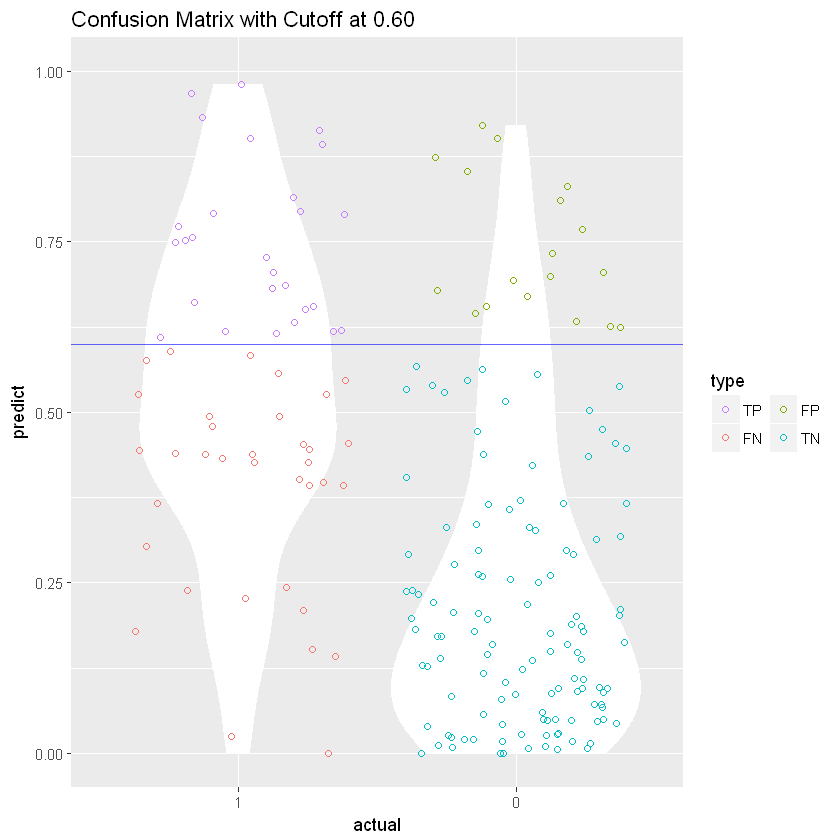

In [65]:
cm_info <- ConfusionMatrixInfo( data = split_data_set$test, predict = "predictions", 
                                actual = "V21", cutoff = .6 )
cm_info$plot



The plot above shows that if we increase the cutoff point anymore we will misclassify more true positive results and misclassify less false positives - this makes it difficult to observe the effects different thresholds have on our response. All of this further cements the idea that ***we need to use a different model selection criteria other than accuracy to pick the optimal threshold value!***





### Using ROC for model selection criteria

I will borrow another function from ethen to further highlight the need to pick the correct model selection criteria for your specific dataset:



In [66]:
ROCInfo <- function( data, predict, actual, cost.fp, cost.fn )
{
    # calculate the values using the ROCR library
    # true positive, false postive 
    pred <- prediction( data[[predict]], data[[actual]] )
    perf <- performance( pred, "tpr", "fpr" )
    roc_dt <- data.frame( fpr = perf@x.values[[1]], tpr = perf@y.values[[1]] )

    # cost with the specified false positive and false negative cost 
    # false postive rate * number of negative instances * false positive cost + 
    # false negative rate * number of positive instances * false negative cost
    cost <- perf@x.values[[1]] * cost.fp * sum( data[[actual]] == 0 ) + 
            ( 1 - perf@y.values[[1]] ) * cost.fn * sum( data[[actual]] == 1 )

    cost_dt <- data.frame( cutoff = pred@cutoffs[[1]], cost = cost )

    # optimal cutoff value, and the corresponding true positive and false positive rate
    best_index  <- which.min(cost)
    best_cost   <- cost_dt[ best_index, "cost" ]
    best_tpr    <- roc_dt[ best_index, "tpr" ]
    best_fpr    <- roc_dt[ best_index, "fpr" ]
    best_cutoff <- pred@cutoffs[[1]][ best_index ]

    # area under the curve
    auc <- performance( pred, "auc" )@y.values[[1]]

    # normalize the cost to assign colors to 1
    normalize <- function(v) ( v - min(v) ) / diff( range(v) )

    # create color from a palette to assign to the 100 generated threshold between 0 ~ 1
    # then normalize each cost and assign colors to it, the higher the blacker
    # don't times it by 100, there will be 0 in the vector
    col_ramp <- colorRampPalette( c( "green", "orange", "red", "black" ) )(100)   
    col_by_cost <- col_ramp[ ceiling( normalize(cost) * 99 ) + 1 ]

    roc_plot <- ggplot( roc_dt, aes( fpr, tpr ) ) + 
                geom_line( color = rgb( 0, 0, 1, alpha = 0.3 ) ) +
                geom_point( color = col_by_cost, size = 4, alpha = 0.2 ) + 
                geom_segment( aes( x = 0, y = 0, xend = 1, yend = 1 ), alpha = 0.8, color = "royalblue" ) + 
                labs( title = "ROC", x = "False Postive Rate", y = "True Positive Rate" ) +
                geom_hline( yintercept = best_tpr, alpha = 0.8, linetype = "dashed", color = "steelblue4" ) +
                geom_vline( xintercept = best_fpr, alpha = 0.8, linetype = "dashed", color = "steelblue4" )

    cost_plot <- ggplot( cost_dt, aes( cutoff, cost ) ) +
                 geom_line( color = "blue", alpha = 0.5 ) +
                 geom_point( color = col_by_cost, size = 4, alpha = 0.5 ) +
                 ggtitle( "Cost" ) +
                 geom_vline( xintercept = best_cutoff, alpha = 0.8, linetype = "dashed", color = "steelblue4" ) +
                 labs(x="Threshold", y="Cost")

    # the main title for the two arranged plot
    sub_title <- sprintf( "Threshold at %.2f - Total Cost = %d, AUC = %.3f", 
                          best_cutoff, best_cost, auc )

    # arranged into a side by side plot
    plot <- arrangeGrob( roc_plot, cost_plot, ncol = 2, 
                         top = textGrob( sub_title, gp = gpar( fontsize = 16, fontface = "bold" ) ) )

    return( list( plot  = plot, 
                  cutoff  = best_cutoff, 
                  totalcost   = best_cost, 
                  auc         = auc,
                  sensitivity = best_tpr, 
                  specificity = 1 - best_fpr ) )
}



### Define the cost of misclassification

From the data dictionary, we are told that the cost of *incorrectly identifying a bad customer as good, is 5 times worse than incorrectly classifying a good customer as bad.*. This directly translates into us classifying the cost of a false negative to be 5x worse then a false positive. See reference below for an example that also uses a credit dataset:

reference: http://support.sas.com/resources/papers/proceedings17/0942-2017.pdf



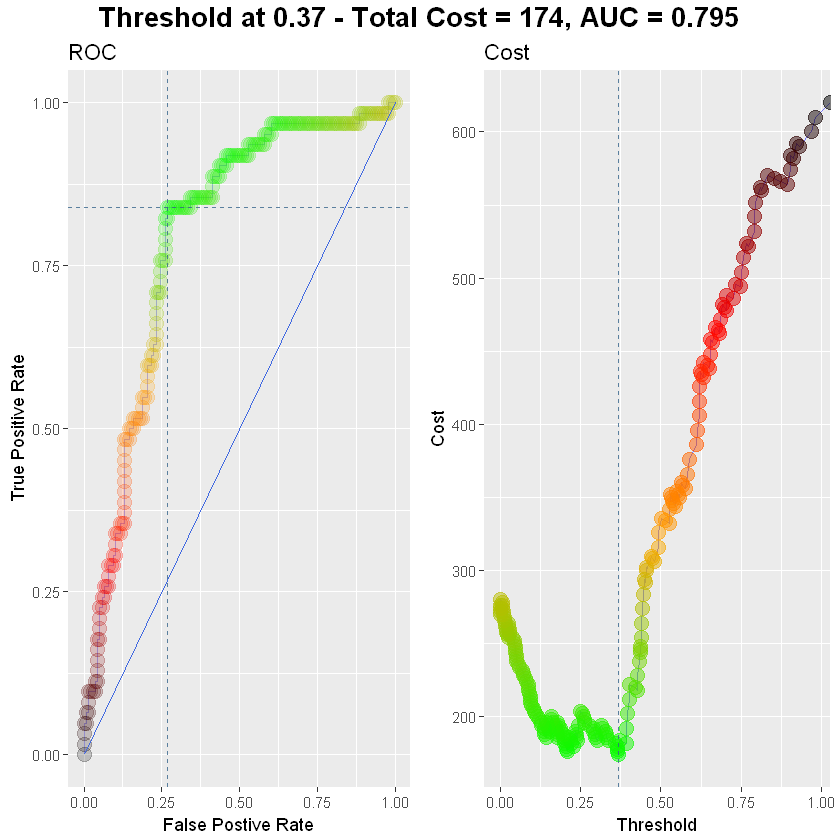

In [67]:
cost_fp <- 2
cost_fn <- 10
roc_info <- ROCInfo(data = cm_info$data, predict = "predict", 
                     actual = "actual", cost.fp = cost_fp, cost.fn = cost_fn)
grid.draw(roc_info$plot)



### Fin!

There you have it! We have successfully found the optimal threshold value (0.37) for our logistic regression model that classifies credit loan applicants as either "Good" or "Bad" credit risk. We can interpret the optimal threshold value in the following way:

*If the probability of credit default is higher then 37%, we label the applicant as a "Bad" credit risk.*

We came to this conclusion by training our logistic regression model on 80% of the dataset, testing on 20% of the dataset, and by using AUC as our model selection criteria. An additional step I could take, but will spare the reader of, is using leave-one-out cross-validation to insure our findings are unbiased.